<a href="https://colab.research.google.com/github/GabrielJunqueira/Python/blob/main/Machine%20Learning%20-%20Classication%20Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/Customer-Churn.csv')

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.head(10)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim
5,0,Nao,Nao,8,Sim,Sim,FibraOptica,Nao,Nao,Sim,Nao,Sim,Sim,Mensalmente,Sim,ChequeDigital,99.65,Sim
6,0,Nao,Sim,22,Sim,Sim,FibraOptica,Nao,Sim,Nao,Nao,Sim,Nao,Mensalmente,Sim,CartaoDeCredito,89.10,Nao
7,0,Nao,Nao,10,Nao,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,Nao,ChequePapel,29.75,Nao
8,0,Sim,Nao,28,Sim,Sim,FibraOptica,Nao,Nao,Sim,Sim,Sim,Sim,Mensalmente,Sim,ChequeDigital,104.80,Sim
9,0,Nao,Sim,62,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,UmAno,Nao,DebitoEmConta,56.15,Nao


In [5]:
traducao_dic = {
    'Sim' : 1,
    'Nao' : 0
}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [6]:
#para colunas que não simplesmente sim e não, podemos utilizar a função get_dummies
#essa função vai quebrar cada dado que não é sim ou não em uma outra coluna
#colocamos as colunas que NÃO QUEREMOS em dados.drop:

dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

#junção dos dados transformados com os que já tinhamos:
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [7]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [8]:
pd.set_option('display.max_columns', 39)

## Dados Desbalancedos

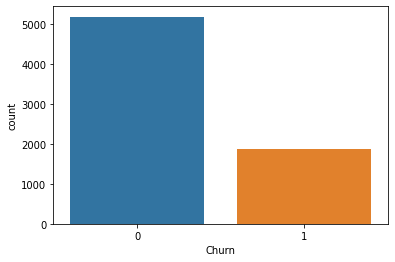

In [9]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [10]:
dados_final.shape

(7043, 39)

In [11]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 14.6 MB/s 
     |████████████████████████████████| 199 kB 45.0 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [12]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [13]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [14]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


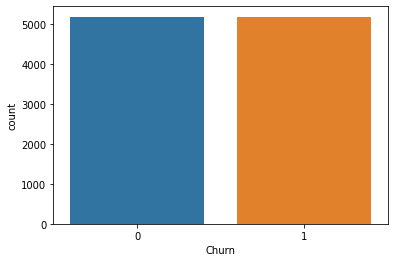

In [15]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [16]:
dados_final.shape

(10348, 39)

## Classificação

In [17]:
#vetor x (x1, x2, ...) -> informções dos clientes
#y -> churn -> resultado de uma função desconhecida que a maquina vai aprender com o algoritmo (a partir da entrada dos dados)

### KNN

In [18]:
#Recebe dados novos, calcula a distância para os outros dados que já tínhamos e classifica
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [19]:
#o X será todas as colunas menos o churn:
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [20]:
#antes devemos normalizar os dados que temos:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

X_normalizado = norm.fit_transform(X)

In [21]:
#caracteristicas do cliente 0 normalizado (menos o churn)
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [22]:
#normalizando somente os dados da Maria:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

In [23]:
#calculo da distância da Maria com o cliente zero 
#distância euclidiana 
import numpy as np
a = Xmaria_normalizado
b = X_normalizado[0]

In [24]:
valor = np.sum(np.square(a-b))

In [25]:
raiz_do_valor = np.sqrt(valor)
raiz_do_valor

9.576326657950807

In [26]:
#9.576 é a distância euclidiana entre a Maria e o cliente 0

## Implementando o Modelo

In [27]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [28]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)
#treino 30% do conjunto 
#estado de aleatoriedade = garante a reprodutividade dos resultados (garante que não seja diferente toda vez que roda)

## Treino e Teste

In [29]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#instanciar o modelo - por padrão 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

In [31]:
#treinando o modelo com os dados do treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [32]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [33]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

## Desafio - Calcular a distância da Maria com os 10 primeiros clientes

In [34]:
# X_normalizado[0:11]

In [35]:
#calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

def calcula_distancia(dados_clientes, dados_maria, n_clientes):

  distancias = []

  for cliente in range(n_clientes):
   distancias.append(np.sqrt(np.sum(np.square(dados_maria - dados_clientes[cliente]))))
  
  return distancias
   


In [36]:
calcula_distancia(X_normalizado, Xmaria_normalizado, 10)


[9.576326657950807,
 9.16406548686776,
 8.496555129772961,
 10.037406936401425,
 7.80258342457135,
 9.011362965863293,
 8.969899786778234,
 10.634386045271398,
 9.45005797136694,
 7.919933933932327]

## Bernoulli Naive Bayes

In [37]:
# Bayes - A probabilidade de x dado que y aconteceu vezes a probabilidade de y dividido pela probabilidade de x é igual a probabilidade de y dado que x aconteceu
from sklearn.naive_bayes import BernoulliNB

In [38]:
#binarize: modelo transforma as variáveis em binário, seguindo um trashhold, no caso aqui a mediana
np.median(X_treino)

-0.4461759755508453

In [39]:
#mediana será o valor central
#modelo
bnb = BernoulliNB(binarize=-0.44)
#variaveis com valores acima serão 1, valores abaixo serão 0 

In [40]:
#treinando o modelo
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.44)

In [41]:
#testando a eficácia do modelo
predito_BNb = bnb.predict(X_teste)

In [42]:
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

## Árvore de Decisão

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [45]:
#treinando o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
#função que verifica a importância de cada atributo na árvore
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [47]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [48]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

## Validação dos Modelos

### Matriz de Confusão

In [49]:
## Verdadeiro Positivo     Falso Negativo
## Falso Positivo          Verdadeiro Negativo

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 247 1289]]


In [52]:
print(confusion_matrix(y_teste, predito_BNb))

[[1050  519]
 [ 242 1294]]


In [53]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


### Acurácia

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


In [56]:
print(accuracy_score(y_teste, predito_BNb))

0.7549114331723027


In [57]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8077294685990338


### Precisão

In [58]:
#Quantos foram classificados corretamente como positivos

In [59]:
from sklearn.metrics import precision_score

In [60]:
print(precision_score(y_teste, predito_knn))

0.7971552257266543


In [61]:
print(precision_score(y_teste, predito_BNb))

0.7137341423055709


In [62]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7973400886637112


### Recall

In [63]:
#o quão bom nosso modelo está em classificar resultados realmente positivos

In [64]:
from sklearn.metrics import recall_score

In [65]:
print(recall_score(y_teste, predito_knn))

0.8391927083333334


In [66]:
print(recall_score(y_teste, predito_BNb))

0.8424479166666666


In [67]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8196614583333334
